# Predicting Approval of the loan using machine learning

This notebook using python for machine learning and data science in attempt to predict the approval of the loan based on the attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem definition
We assume as a loan officer who is deciding whether to approve a loan to a small business. In this case, we predict the approval (**Approved** or **not approved**) based on the attributes.

## 2. Data
This dataset can be looked at this link: https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

## 3. Evaluation

Evaluation metrics are:
* Accuracy (90%)
* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* Classification report
* F1-score
* Cross-validation

## 4. Features

Information about the description of features

**Create data dictionary:**
* LoanNr_ChkDgt = Identifier Primary key
* Name = Borrower name
* City = Borrower city
* State = Borrower state
* Zip	= Borrower zip code
* Bank = Bank name
* BankState = Bank state
* NAICS = North American industry classification system code
* ApprovalDate = Date SBA commitment issued
* ApprovalFY = Fiscal year of commitment
* Term = Loan term in months
* NoEmp = Number of business employees
* NewExist  -  1 = Existing business (0) , 2 = New business (1)
* CreateJob = Number of jobs created
* RetainedJob	= Number of jobs retained
* FranchiseCode =Franchise code, (00000 or 00001) = No * franchise
* UrbanRural - 1 = Urban, 2 = rural, 0 = undefined
* RevLineCr = Revolving line of credit: Y = Yes, N = No
* LowDoc = LowDoc Loan Program: Y = Yes, N = No
* ChgOffDate = The date when a loan is declared to be in * default
* DisbursementDate = Disbursement date
* DisbursementGross = Amount disbursed
* BalanceGross = Gross amount outstanding
* MIS_Status - Loan status charged off = CHGOFF (1) , Paid in full = PIF (0) (Target)
* ChgOffPrinGr = Charged-off amount
* GrAppv = Gross amount of loan approved by bank
* SBA_Appv = SBA’s guaranteed amount of approved loan


## Preparing the tools
We're going to use pandas, Matplotlib , seaborn, and NumPy for data analysis and manipulation. We're using scikit-learn for machine learning

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




df = pd.read_csv(r"C:\Users\Anggi Darmansyah\Downloads\Final Project\SBAnational.csv")
df.head(5)

C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Problems of this dataset are:
1. Check data types and change it to numeric
2. Check the missing values
3. Removes the symbol

In [41]:
#Menampilkan data-data yang kosong dan juga tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [42]:
#Menampilkan jumlah missing values setiap variabel
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [43]:
#Menampilkan isi dataframe awal
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [45]:
#Merubah tipe data ApprovalFY
df['ApprovalFY'].fillna(0, inplace=True)

# Mengonversi tipe data kolom 'ApprovalFY' menjadi numerik
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')

# Mengonversi tipe data kolom 'ApprovalFY' menjadi integer
df['ApprovalFY'] = df['ApprovalFY'].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  int32  
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [46]:
#Merubah tipe data DisbursementGross
df['DisbursementGross'] = df['DisbursementGross'].astype(str).str.replace('$','').str.replace(',','').astype(float).astype(int)

C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [47]:
#Merubah tipe data Charge Off Gross
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].astype(str)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('$','').str.replace(',','').astype(float).astype(int)

C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#Merubah tipe data Gross Approval
df['GrAppv'] = df['GrAppv'].astype(str)
df['GrAppv'] = df['GrAppv'].str.replace('$','').str.replace(',','').astype(float).astype(int)

C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
#Merubah tipe data SBA Approval
df['SBA_Appv'] = df['SBA_Appv'].astype(str)
df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','').str.replace(',','').astype(float).astype(int)

C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
#Memunculkan perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  int32  
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [51]:
#Membuat kolom baru yang berisikan data sebagai berikut

df['% Payment'] = (df['ChgOffPrinGr'] / df['GrAppv']) * 100
df['Payment / Month'] = df['GrAppv'] / df['Term']
df['SBA_Portion'] = df['SBA_Appv'] / df['GrAppv']
df['Disbursement Year'] = pd.to_datetime(df['DisbursementDate']).dt.year
df['ChgOff Year'] = pd.to_datetime(df['ChgOffDate']).dt.year
df['Industial Code'] = df['NAICS'].astype(str).str[:2]

In [52]:
df['MIS_Status'] = df['MIS_Status'].replace({'CHGOFF': 1, 'P I F': 0})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  int32  
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [54]:
# Hitung statistik deskriptif
desc = df[['Term', 'NoEmp', 'CreateJob','RetainedJob','DisbursementGross','ChgOffPrinGr','GrAppv','SBA_Appv','% Payment','Payment / Month','SBA_Portion']].describe()

# Tampilkan hasil
print(desc)

                Term          NoEmp      CreateJob    RetainedJob  \
count  899164.000000  899164.000000  899164.000000  899164.000000   
mean      110.773078      11.411353       8.430376      10.797257   
std        78.857305      74.108196     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%        60.000000       2.000000       0.000000       0.000000   
50%        84.000000       4.000000       0.000000       1.000000   
75%       120.000000      10.000000       1.000000       4.000000   
max       569.000000    9999.000000    8800.000000    9500.000000   

       DisbursementGross  ChgOffPrinGr        GrAppv      SBA_Appv  \
count       8.991640e+05  8.991640e+05  8.991640e+05  8.991640e+05   
mean        2.011540e+05  1.350330e+04  1.926870e+05  1.494888e+05   
std         2.876408e+05  6.515229e+04  2.832634e+05  2.284146e+05   
min         0.000000e+00  0.000000e+00  2.000000e+02  1.000000e+02   
25%         4.200000e+04  0.

In [55]:
#Mengecek apakah ada duplikasi
df.duplicated().any()

False

### Univariate Analysis

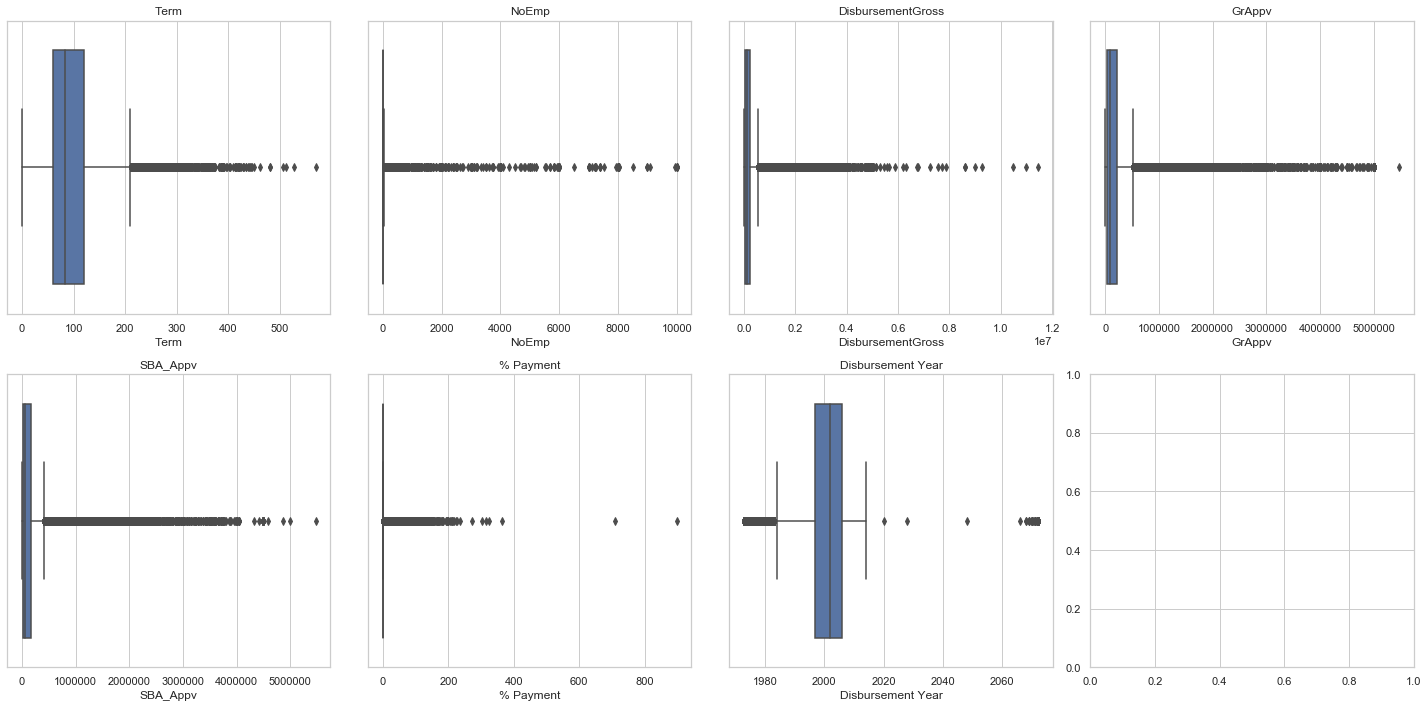

In [56]:
#Melakukan Univariate Analysis menggunakan Box Plot untuk variabel di bawah

# Variabel yang akan digunakan pada box plot
variables = ['Term', 'NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv', '% Payment', 'Disbursement Year']

# Membuat figure dengan ukuran 20x10 inch
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Meloop setiap variabel dan menggambar box plotnya
for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df[var], ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout()
plt.show()

In [57]:
#Menghitung jumlah outlier untuk setiap variabel melalui kuartile
outliers = {}
for col in ['Term', 'NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv', '% Payment', 'Disbursement Year']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    outliers[col] = len( df[( df[col] < lower) | ( df[col] > upper)])
print(outliers)

{'Term': 158700, 'NoEmp': 97222, 'DisbursementGross': 83643, 'GrAppv': 85523, 'SBA_Appv': 90174, '% Payment': 162012, 'Disbursement Year': 3798}


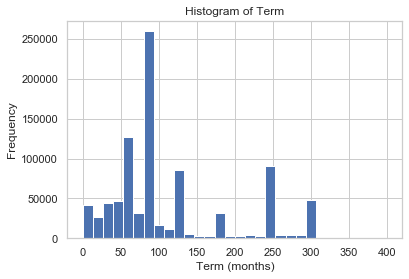

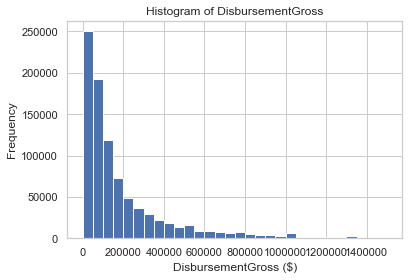

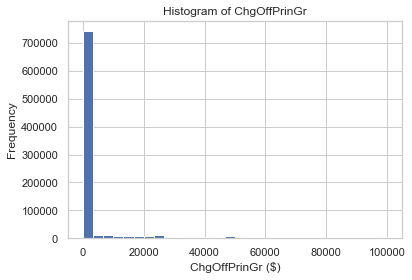

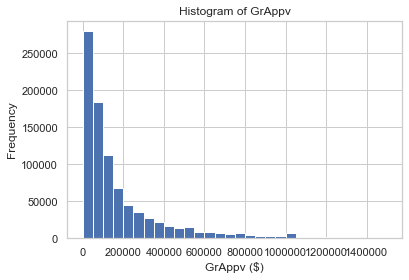

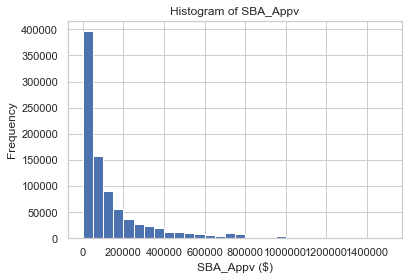

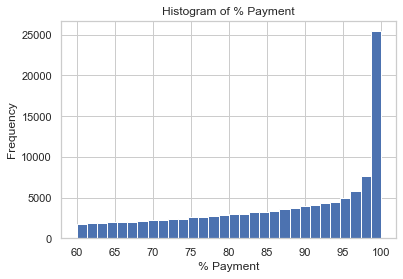

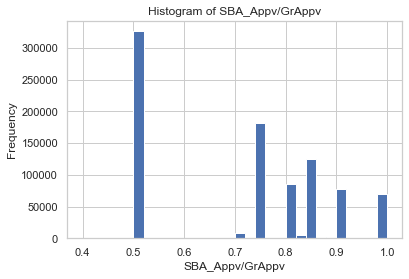

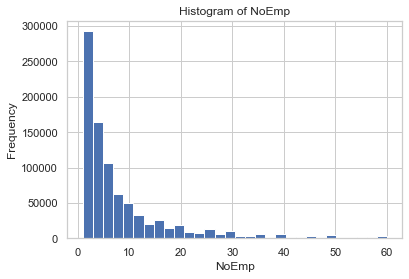

In [58]:
#Melakukan Univariate Analysis menggunakan Histogram untuk variabel di bawah

import matplotlib.pyplot as plt

# Membuat histogram dari variabel Term
plt.hist(df['Term'], bins=30, range=(0, 400))
plt.title('Histogram of Term')
plt.xlabel('Term (months)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel DisbursementGross
plt.hist(df['DisbursementGross'], bins=30, range=(0, 1500000))
plt.title('Histogram of DisbursementGross')
plt.xlabel('DisbursementGross ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel ChgOffPrinGr
plt.hist(df['ChgOffPrinGr'], bins=30, range=(0, 100000))
plt.title('Histogram of ChgOffPrinGr')
plt.xlabel('ChgOffPrinGr ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel GrAppv
plt.hist(df['GrAppv'], bins=30, range=(0,1500000))
plt.title('Histogram of GrAppv')
plt.xlabel('GrAppv ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel SBA_Appv
plt.hist(df['SBA_Appv'], bins=30, range=(0,1500000))
plt.title('Histogram of SBA_Appv')
plt.xlabel('SBA_Appv ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel % Payment
plt.hist(df['% Payment'], bins=30, range=(60,100))
plt.title('Histogram of % Payment')
plt.xlabel('% Payment')
plt.ylabel('Frequency')
plt.show()


# Membuat histogram dari variabel SBA_Appv/GRAppv
plt.hist(df['SBA_Portion'], bins=30, range=(0.4,1))
plt.title('Histogram of SBA_Appv/GrAppv')
plt.xlabel('SBA_Appv/GrAppv')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel NoEmp
plt.hist(df['NoEmp'], bins=30, range=(1,60))
plt.title('Histogram of NoEmp')
plt.xlabel('NoEmp')
plt.ylabel('Frequency')
plt.show()


### MultiVariate Analysis

1. Analisis Menggunakan Scatter Plot dan jarak Mahalanobis untuk mengetahui jumlah Outlier
2. Analisis Heat Map untuk melihat korelasi label dan feature serta antara feature

Text(0, 0.5, 'ChgOffPrinGr')

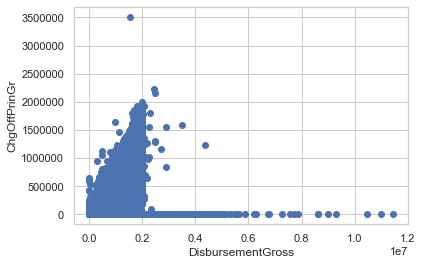

In [59]:
#Analisis MultiVariate menggunakan Scatter Plot

#Menampilkan Scatter plot Disbursment Gross vs ChgOffPrinGr untuk identifikasi outlier

plt.scatter(df['DisbursementGross'], df['ChgOffPrinGr'])
plt.xlabel('DisbursementGross')
plt.ylabel('ChgOffPrinGr')

In [60]:
Q1 = df[['DisbursementGross', 'ChgOffPrinGr']].quantile(0.25)
Q3 = df[['DisbursementGross', 'ChgOffPrinGr']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['DisbursementGross'] < lower.DisbursementGross) | (df['DisbursementGross'] > upper.DisbursementGross)) | ((df['ChgOffPrinGr'] < lower.ChgOffPrinGr) | (df['ChgOffPrinGr'] > upper.ChgOffPrinGr))]
print(len(outliers))

238477


Text(0, 0.5, 'ChgOffPrinGr')

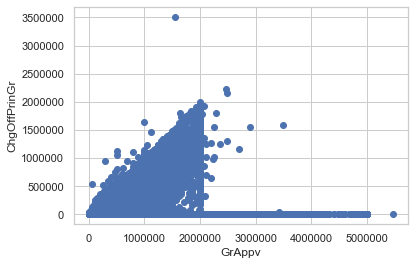

In [61]:
#Menampilkan Scatter plot GrAppv vs ChgOffPrincGr untuk identifikasi outlier
plt.scatter(df['GrAppv'], df['ChgOffPrinGr'])
plt.xlabel('GrAppv')
plt.ylabel('ChgOffPrinGr')

In [62]:
Q1 = df[['GrAppv', 'ChgOffPrinGr']].quantile(0.25)
Q3 = df[['GrAppv', 'ChgOffPrinGr']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['GrAppv'] < lower.GrAppv) | (df['GrAppv'] > upper.GrAppv)) | ((df['ChgOffPrinGr'] < lower.ChgOffPrinGr) | (df['ChgOffPrinGr'] > upper.ChgOffPrinGr))]
print(len(outliers))

240233


Text(0, 0.5, 'Term')

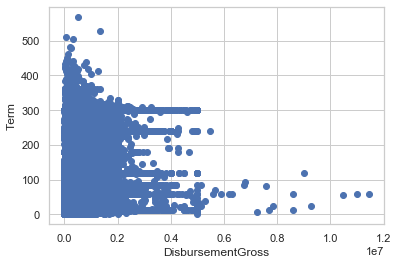

In [63]:
#Menampilkan Scatter plot Term vs Disbursement Gross untuk identifikasi outlier
plt.scatter(df['DisbursementGross'], df['Term'])
plt.xlabel('DisbursementGross')
plt.ylabel('Term')

In [64]:
Q1 = df[['Term', 'DisbursementGross']].quantile(0.25)
Q3 = df[['Term', 'DisbursementGross']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['Term'] < lower.Term) | (df['Term'] > upper.Term)) | ((df['DisbursementGross'] < lower.DisbursementGross) | (df['DisbursementGross'] > upper.DisbursementGross))]
print(len(outliers))

192499


Text(0, 0.5, 'SBA_Appv')

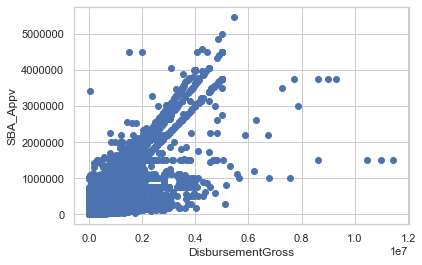

In [65]:
#Menampilkan Scatter plot Term vs Disbursement Gross untuk identifikasi outlier
plt.scatter(df['DisbursementGross'], df['SBA_Appv'])
plt.xlabel('DisbursementGross')
plt.ylabel('SBA_Appv')

In [66]:
from scipy.stats import chi2


# Menentukan variabel yang menjadi fokus outlier
subset_cols = ['Term', 'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# membuat dataframe baru dari variabel diatas
X = df[subset_cols]

# menghitung vektor rata-rata dan matrix covarians
mean_vector = X.mean().values
covariance_matrix = X.cov().values

# menghitung inverse matrix covarians
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

# menentukan signifikansi level
significance_level = 0.01

# menghitung nilai chi-square
chi_square = chi2.ppf((1 - significance_level), df=X.shape[1]-1)

# membuat kolom baru untuk nilai mahalanobis
df['Mahalanobis'] = 0

# Menghitung setiap nilai mahalanobis untuk masing-masing baris
for i in range(len(X)):
    x = X.iloc[i].values
    delta = x - mean_vector
    distance = np.sqrt(np.dot(np.dot(delta, inverse_covariance_matrix), delta.T))
    df.at[X.index[i], 'Mahalanobis'] = distance

# menentukan jumlah outlier yang teridentifikasi
outliers = df[df['Mahalanobis'] > chi_square].index.tolist()
print(len(outliers))

2291


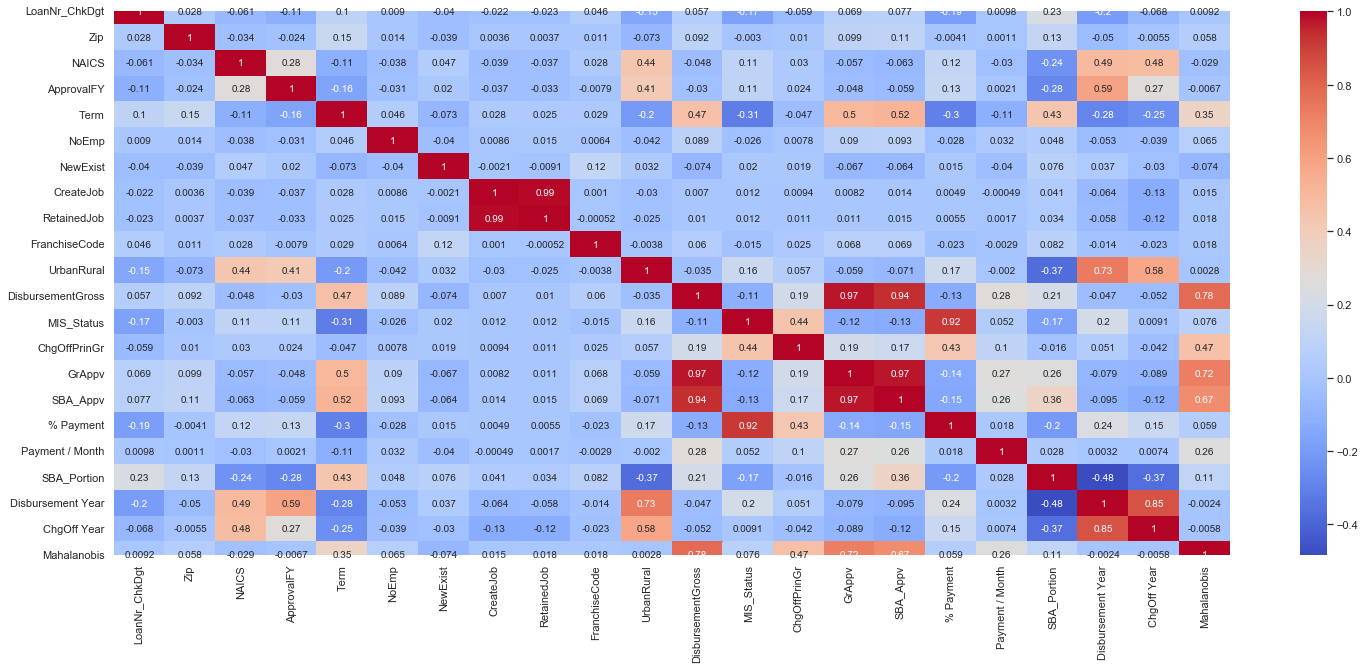

In [67]:
# Menghitung matriks korelasi untuk menentukan hubungan antara label dan feature
corr_matrix = df.corr()

# Mengatur Ukuran Gambar
plt.figure(figsize=(25,10))

# Membuat HeatMap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})

# Mengatur ukuran font
sns.set(font_scale=1.2)

# Menunjukan Plot
plt.show()

### Business Insight

C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Anggi Darmansyah\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


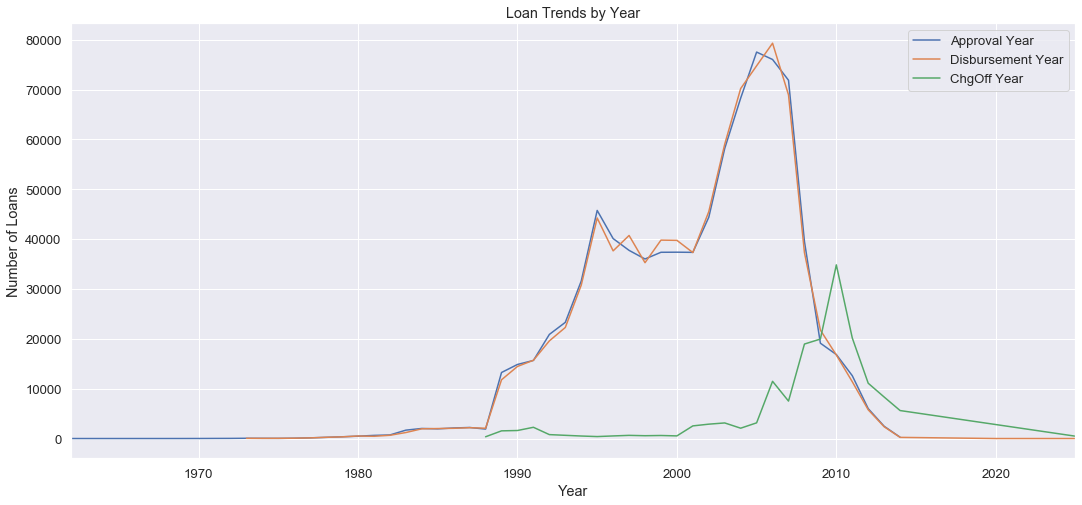

In [68]:
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(18,8))

# plot ApprovalFY
plt.plot(df.groupby('ApprovalFY')['LoanNr_ChkDgt'].count().index, 
         df.groupby('ApprovalFY')['LoanNr_ChkDgt'].count().values, 
         label='Approval Year')

# plot Disbursement Year
plt.plot(df.groupby('Disbursement Year')['LoanNr_ChkDgt'].count().index, 
         df.groupby('Disbursement Year')['LoanNr_ChkDgt'].count().values, 
         label='Disbursement Year')

# plot ChgOff Year
plt.plot(df.groupby('ChgOff Year')['LoanNr_ChkDgt'].count().index, 
         df.groupby('ChgOff Year')['LoanNr_ChkDgt'].count().values, 
         label='ChgOff Year')

# set x-axis label
plt.xlabel('Year')

# set y-axis label
plt.ylabel('Number of Loans')

# set x-axis range
plt.xlim(1962, 2025)

# set title
plt.title('Loan Trends by Year')

# add legend
plt.legend()

# show plot
plt.show()

# Terdapat sebuah insight dimana terjadi lonjakan permintaan loan dari periode 1990 sampai 2007. Pada 2007 - 2009 terjadi krisis finansial di amerika dimana banyak kredit mengalami kegagalan bayar sampai puncaknya pada tahun 2010. Faktor ini sangat berpengaruh dalam memprediksi faktor penyebab kegagalan dalam pembayaran kredit.

In [69]:
# calculate total number of observations
total_obs = len(df)

# calculate number of ChgOff observations
chgoff_obs = len(df[df['MIS_Status'] == 1])

# calculate number of PIF observations
pif_obs = len(df[df['MIS_Status'] == 0])

# calculate percentage of ChgOff observations
chgoff_pct = chgoff_obs / total_obs * 100

# calculate percentage of PIF observations
pif_pct = pif_obs / total_obs * 100

# print the results
print('Percentage of ChgOff observations: {:.2f}%'.format(chgoff_pct))
print('Percentage of PIF observations: {:.2f}%'.format(pif_pct))

Percentage of ChgOff observations: 17.52%
Percentage of PIF observations: 82.26%


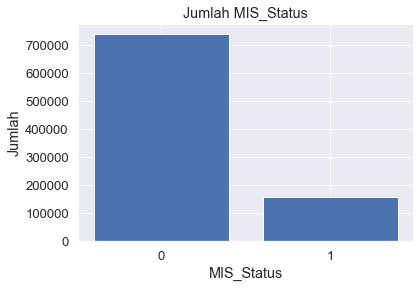

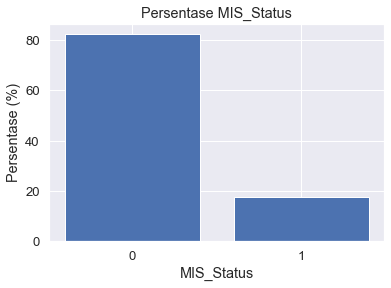

In [70]:
import matplotlib.pyplot as plt

# Hitung jumlah MIS_Status
count_mis_status = df['MIS_Status'].value_counts()

# Hitung persentase MIS_Status
percent_mis_status = df['MIS_Status'].value_counts(normalize=True) * 100

# Plot bar chart jumlah MIS_Status
plt.bar(count_mis_status.index, count_mis_status.values)
plt.title('Jumlah MIS_Status')
plt.xlabel('MIS_Status')
plt.ylabel('Jumlah')
plt.xticks([0,1], ['0','1'])
plt.show()

# Plot bar chart persentase MIS_Status
plt.bar(percent_mis_status.index, percent_mis_status.values)
plt.title('Persentase MIS_Status')
plt.xlabel('MIS_Status')
plt.ylabel('Persentase (%)')
plt.xticks([0,1], ['0','1'])
plt.show()

# Jumlah Presentase debitur yang berhasil sebanyak 82% dan debitur yang mengalami gagal bayar sebanyak 18%. Hal ini menyebabkan jumlah data menjadi tidak balance dan perlu dilakukan penyesuaian.

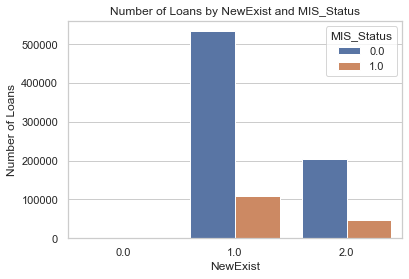

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
ax = sns.countplot(x="NewExist", hue="MIS_Status", data=df)

plt.title('Number of Loans by NewExist and MIS_Status')
plt.xlabel('NewExist')
plt.ylabel('Number of Loans')
plt.legend(title='MIS_Status', loc='upper right')

plt.show()

# Dari data yang diperoleh dapat diketahui bahwa perusahaan yang sudah berjalan lebih banyak mengalami kegagalan dalam membayar kredit dibandingkan perusahaan yang baru merintis

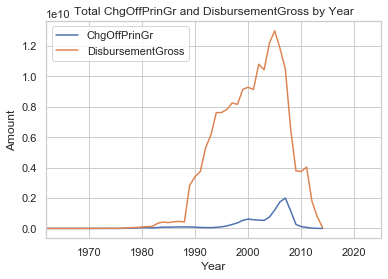

In [72]:
# Menghitung total ChgOffPrinGr dan DisbursementGross untuk setiap tahun
yearly_totals = df.groupby('ApprovalFY')[['ChgOffPrinGr', 'DisbursementGross']].sum()

# Membuat line plot
yearly_totals.plot(kind='line')

# Mengatur label sumbu x dan y serta judul plot
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total ChgOffPrinGr and DisbursementGross by Year')

# set x-axis range
plt.xlim(1962, 2025)

# Menampilkan plot
plt.show()

# Grafik di atas menampilkan informasi terkait jumlah dana yang dikeluarkan oleh kreditur setiap tahun (garis merah) dan jumlah dana yang tersisa dari kredit yang mengalami masalah pembayaran. Jumlah loss dari dana yang macet tidak terlalu besar dibanding jumlah total dana yang dikeluarkan setiap tahun.

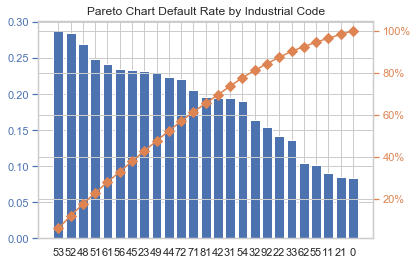

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Menghitung total Case pada setiap Industrial Code
grouped = df.groupby(['Industial Code'])['MIS_Status'].count().reset_index()

# Menghitung total CHGOFF pada setiap Industrial Code
grouped2 = df.groupby(['Industial Code'])['MIS_Status'].apply(lambda x: (x==1).sum()).reset_index()

# Menggabungkan kedua dataframe
merged = pd.merge(grouped, grouped2, on='Industial Code')
merged.columns = ['Industial Code', 'Total Case', 'Total CHGOFF']

# Menghitung default rate
merged['Default Rate'] = merged['Total CHGOFF'] / merged['Total Case']

# Mengurutkan nilai secara descending
merged = merged.sort_values('Default Rate', ascending=False)

# Membuat pareto chart
fig, ax = plt.subplots()
ax.bar(merged['Industial Code'], merged['Default Rate'], color='C0')
ax2 = ax.twinx()
ax2.plot(merged['Industial Code'], merged['Default Rate'].cumsum()/merged['Default Rate'].sum()*100, color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
plt.title('Pareto Chart Default Rate by Industrial Code')
plt.show()



In [79]:
# Convert ApprovalDate and DisbursementDate columns to datetime values
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [80]:
# Bikin kolom baru
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})



In [82]:
#CREATE NEW COLUMNS
# DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
import numpy as np

df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1] if 'd' in x else x)
df['DaysToDisbursement'] = pd.to_numeric(df['DaysToDisbursement'], errors='coerce').astype('Int64')
df['DaysToDisbursement'] = df['DaysToDisbursement'].replace(np.nan, 0)

df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,SBA_Appv,% Payment,Payment / Month,SBA_Portion,Disbursement Year,ChgOff Year,Industial Code,Mahalanobis,Industry,DaysToDisbursement
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,48000,0.0,714.285714,0.80,1999.0,NaN,45,0,Retail_trade,730
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,32000,0.0,666.666667,0.80,1997.0,NaN,72,0,Accom/Food_serv,92
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,215250,0.0,1594.444444,0.75,1997.0,NaN,62,0,Healthcare/Social_assist,306
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,28000,0.0,583.333333,0.80,1997.0,NaN,0,0,NaN,122
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,229000,0.0,954.166667,1.00,1997.0,NaN,0,1,NaN,75


Requirement already up-to-date: seaborn in c:\users\anggi darmansyah\anaconda3\lib\site-packages (0.12.2)


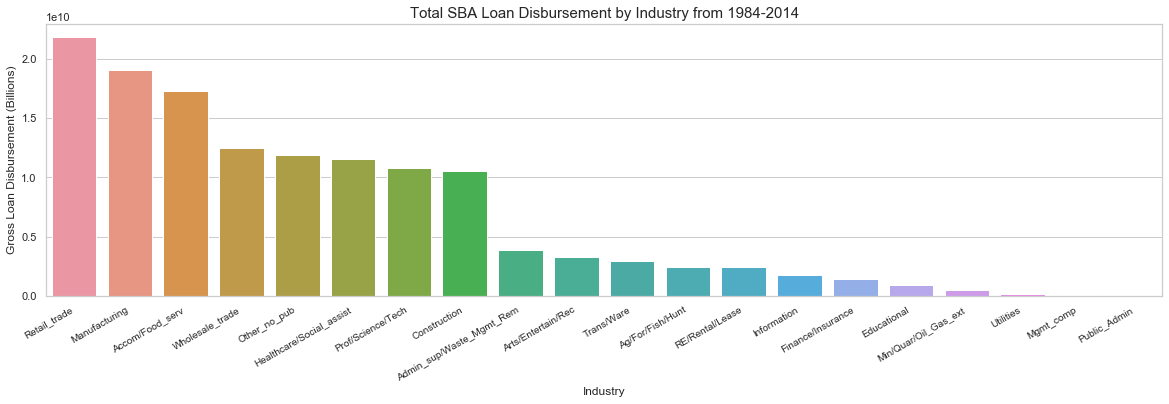

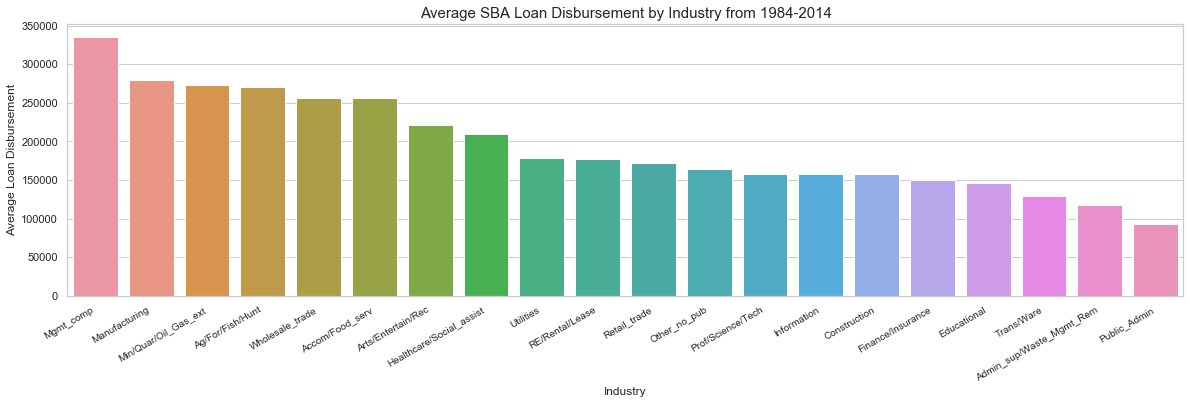

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn --upgrade

# Total disbursed loan amount by industry
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='Industry', y='DisbursementGross', data=df_industrySum.reset_index())
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.title('Total SBA Loan Disbursement by Industry from 1984-2014', fontsize=15)
plt.xlabel('Industry')
plt.ylabel('Gross Loan Disbursement (Billions)')
plt.show()

# Average disbursed loan amount by industry
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='Industry', y='DisbursementGross', data=df_industryAve.reset_index())
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.title('Average SBA Loan Disbursement by Industry from 1984-2014', fontsize=15)
plt.xlabel('Industry')
plt.ylabel('Average Loan Disbursement')
plt.show()


# Sektor industri retail trade dan manufacturing melakukan pinjaman lebih banyak dibanding sektor industri yang lain selama periode tersebut. Meskipun pada sektor industri Agriculture, forestry, fishing & hunting, Mining, quarrying, & oil and gas extraction, dan Management of companies & enterprises memiliki jumlah pinjaman dana yang disalurkan relatif lebih sedikit dibanding industri lainnya. Namun industri tersebut memiliki jumlah pinjaman rata-rata tertinggi dibandingkan dengan industri lain. Hal Ini menunjukkan bahwa industri tersebut memiliki jumlah sedikit dengan nilai pinjaman yang besar

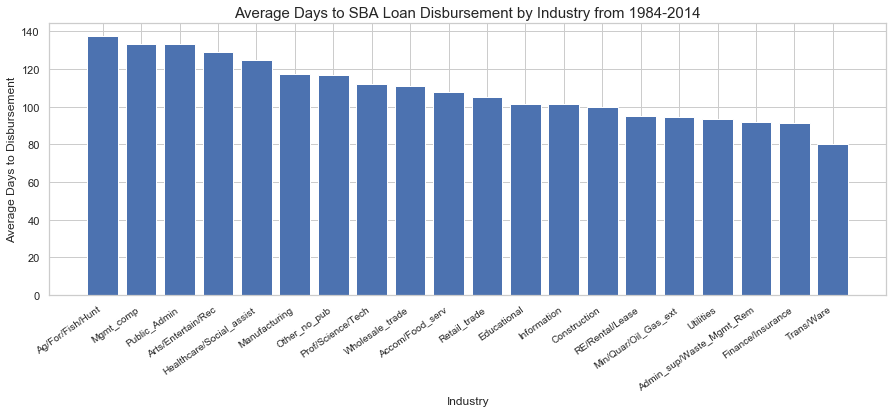

In [134]:
# Average days to disbursement by industry
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2014', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

# Industri dengan rata-rata pencairan pinjaman yang tinggi ternyata sama dengan rata-rata hari yang diperlukan dalam pencairan pinjaman. Industri tersebut yaitu industri Agriculture, forestry, fishing and hunting, Mining, quarrying, and oil and gas extraction, and Management of companies and enterprise

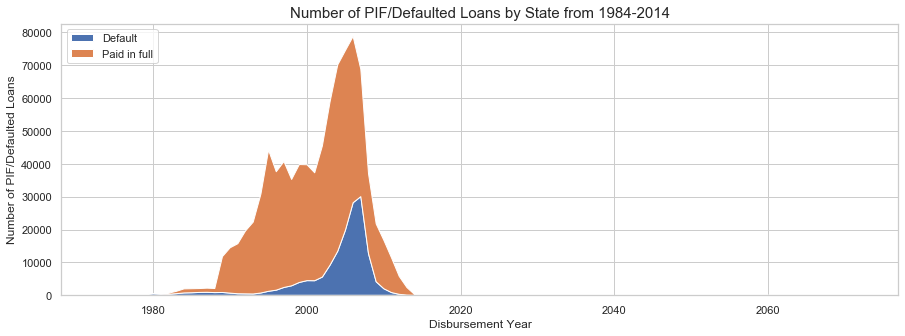

In [88]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['Disbursement Year', 'MIS_Status'])['Disbursement Year'].count().unstack('MIS_Status')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2014', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

In [89]:
# Check Default percentage by Industry
def_ind = df.groupby(['Industry', 'MIS_Status'])['Industry'].count().unstack('MIS_Status')
def_ind['Default_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

MIS_Status,0.0,1.0,Default_Percent
Industry,,,
Accom/Food_serv,52629,14882,0.220438
Admin_sup/Waste_Mgmt_Rem,24868,7661,0.235513
Ag/For/Fish/Hunt,8183,812,0.090272
Arts/Entertain/Rec,11603,3013,0.206144
Construction,51029,15463,0.232554
Educational,4849,1552,0.242462
Finance/Insurance,6778,2692,0.284266
Healthcare/Social_assist,49528,5736,0.103793
Information,8541,2821,0.248284


# Default percentage tertinggi terhadap sektor industri adalah 
- Posisi pertama yaitu sektor RE/Rental/Lease sebesar 28,4%
- Posisi kedua yaitu sektor finance/insurance sebesar 28,7%
- Posisi ketiga yaitu sektor Transportation/Warehousing sebesar 26%.

In [90]:
# Check Default percentage by State
def_state = df.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
def_state['Default_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

MIS_Status,0.0,1.0,Default_Percent
State,,,
AK,2122,281,0.116937
AL,6971,1389,0.166148
AR,5269,1064,0.168009
AZ,13967,3657,0.207501
CA,106328,24160,0.185151
CO,16927,3671,0.178221
CT,10424,1703,0.140430
DC,1226,387,0.239926
DE,1799,394,0.179663


# Default percentage tertinggi terhadap state / negara bagian adalah 
- Posisi pertama pada Florida (FL) sebesar 27%
- Posisi kedua pada Nevada (NV) sebesar 23%
- Posisi ketiga pada Wahsington (DC) sebesar 23%